#  Introduction
This notebook performs clustering analysis on YouTube channel data to identify distinct groups of channels based on their views, subscribers, and video counts.

# Data Loading and Preparation
- We start by importing the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
from IPython.display import Markdown, display
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

The `load_and_prepare_data` function:
- Loads channel data from CSV
- Selects relevant features (views, subscribers, video count)
- Removes duplicates and handles missing values

In [2]:
def load_and_prepare_data(file_path):
    df = pd.read_csv(file_path)
    
    clustering_features = [
        'channel_view_count',
        'channel_subscriber_count',
        'channel_video_count'
    ]
    
    channel_data = df.drop_duplicates(subset='channel_id')[
        ['channel_id', 'video_category_id'] + clustering_features
    ]
    
    channel_data = channel_data.dropna(subset=clustering_features)
    
    return channel_data, clustering_features

# Finding the Optimal Number of Clusters
The `find_optimal_clusters` function:
- Determines optimal number of clusters using elbow method and silhouette analysis
- Plots evaluation metrics for different cluster counts

In [3]:
def find_optimal_clusters(X_scaled, max_clusters=10):
    silhouette_scores = []
    inertias = []
    
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
        inertias.append(kmeans.inertia_)
        
    display(Markdown("## Elbow Method and Silhouette Analysis for Optimal Cluster Selection"))
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(range(2, max_clusters + 1), inertias, marker='o')
    plt.xlabel('Αριθμός clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    
    plt.subplot(1, 2, 2)
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    plt.xlabel('Αριθμός clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Analysis')
    
    plt.tight_layout()
    plt.show()
    
    optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
    return optimal_clusters

# Performing Clustering Analysis
The `perform_clustering_analysis` function:
- Scales the data
- Performs K-means clustering
- Calculates cluster statistics and category distributions

In [4]:
def perform_clustering_analysis(data, features, n_clusters):
    X = data[features].copy()
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    data['cluster'] = kmeans.fit_predict(X_scaled)
    
    cluster_stats = data.groupby('cluster').agg({
        'channel_view_count': ['mean', 'count', 'min', 'max'],
        'channel_subscriber_count': ['mean', 'min', 'max'],
        'channel_video_count': ['mean', 'min', 'max']
    }).round(2)
    
    category_distribution = pd.crosstab(
        data['cluster'], 
        data['video_category_id'], 
        normalize='index'
    ) * 100
    
    return cluster_stats, category_distribution, kmeans.labels_

# Visualizing the Clusters
The function `visualize_clusters` creates scatter plots of the clusters to show relationships between the selected features.

In [5]:
def visualize_clusters(data, features, labels):
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.scatter(data[features[0]], data[features[1]], c=labels, cmap='viridis')
    plt.xlabel('Channel Views')
    plt.ylabel('Subscribers')
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Views vs Subscribers')
    
    plt.subplot(1, 3, 2)
    plt.scatter(data[features[1]], data[features[2]], c=labels, cmap='viridis')
    plt.xlabel('Subscribers')
    plt.ylabel('Video Count')
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Subscribers vs Videos')
    
    plt.subplot(1, 3, 3)
    plt.scatter(data[features[0]], data[features[2]], c=labels, cmap='viridis')
    plt.xlabel('Channel Views')
    plt.ylabel('Video Count')
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Views vs Videos')
    
    plt.tight_layout()
    plt.show()

# Main Execution
- Finally, the `main` function ties everything together and displays the results interactively in the notebook.

## Elbow Method and Silhouette Analysis for Optimal Cluster Selection

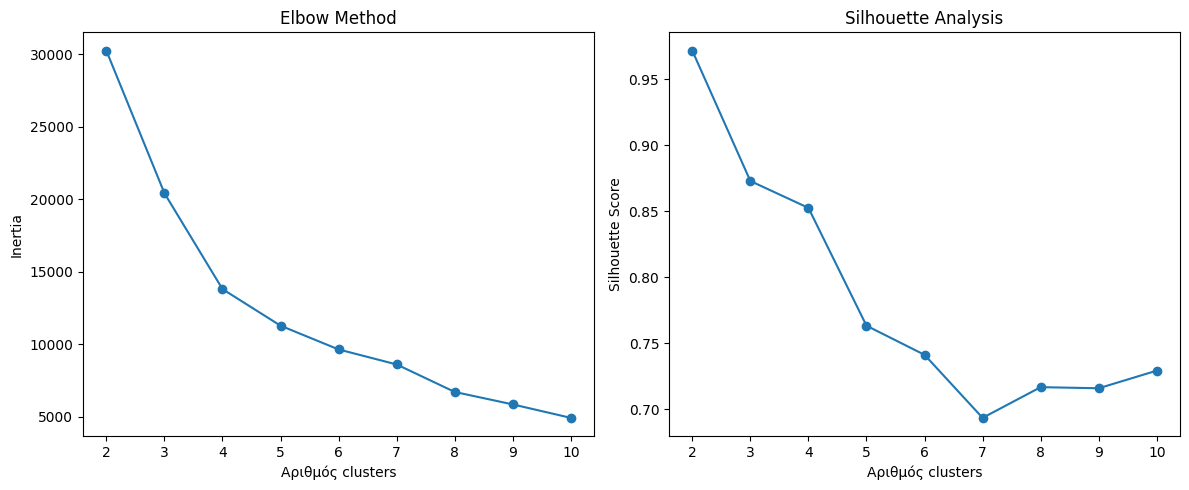

## Optimal Cluster Number


Optimal cluster number:
2


## Cluster Statistics

channel_view_count                                    \
                      mean  count          min           max   
cluster                                                        
0             1.130866e+09  13145            0   60945225476   
1             1.189350e+11      8  60643392470  269373477007   

        channel_subscriber_count                      channel_video_count  \
                            mean       min        max                mean   
cluster                                                                     
0                   2.477422e+06         1  111000000             5526.49   
1                   1.558125e+08  76500000  320000000            88469.62   

                      
         min     max  
cluster               
0          0  539887  
1        822  186323

## Category Distribution Per Cluster (%)

video_category_id,Autos & Vehicles,Comedy,Education,Entertainment,Film & Animation,Gaming,Howto & Style,Music,News & Politics,People & Blogs,Pets & Animals,Science & Technology,Sports,Travel & Events
cluster,,,,,,,,,,,,,,
0,1.871434,4.648155,1.863827,24.747052,3.666793,9.631038,2.799544,15.557246,7.371624,15.907189,0.540129,1.460631,8.862685,1.072651
1,0.000000,0.000000,0.000000,62.500000,0.000000,0.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,12.500000,0.000000


## Cluster Visualizations

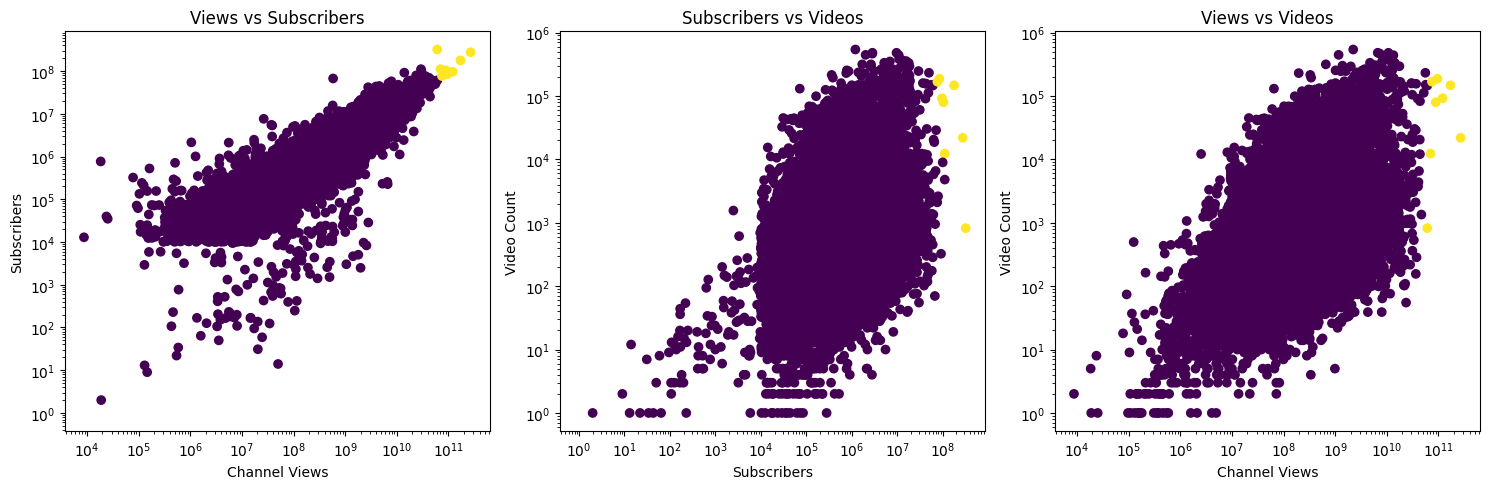

In [6]:
def main():
    file_path = 'cleaned_youtube_trending_videos_global.csv'
    data, features = load_and_prepare_data(file_path)
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(data[features])
    
    optimal_clusters = find_optimal_clusters(X_scaled)
    display(Markdown("## Optimal Cluster Number"))
    print("\nOptimal cluster number:")
    print(optimal_clusters)
    
    cluster_stats, category_dist, labels = perform_clustering_analysis(
        data, features, optimal_clusters
    )
    
    display(Markdown("## Cluster Statistics"))
    display(cluster_stats)
    
    display(Markdown("## Category Distribution Per Cluster (%)"))
    display(category_dist)

    display(Markdown("## Cluster Visualizations"))
    visualize_clusters(data, features, labels)

if __name__ == "__main__":
    main()